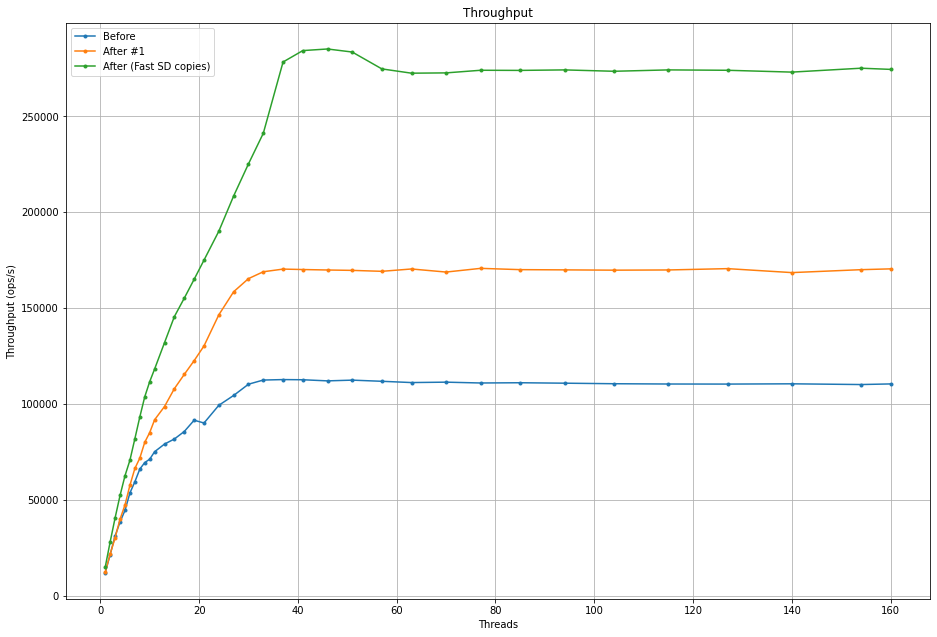

In [1]:
import matplotlib 
%matplotlib inline 

plt = matplotlib.pyplot
fig = plt.figure()

ax = fig.add_axes([0, 0, 2, 2])

def plot_file(fpath: str, label: str):
    content = __import__('json').loads(open(fpath).read())
    samples: list[Any] = content['samples']
    interval: int = content['interval']
    threads = [el['n_threads'] for el in samples]
    rates = [el['rate'] for el in samples]
    ax.plot(threads, rates, marker='.', label=f'{label}')

ax.set_xlabel('Threads')
ax.set_ylabel('Throughput (ops/s)')
ax.set_title('Throughput')
plot_file('before.json', 'Before')
plot_file('after-4114.json', 'After #1')
plot_file('after-new-copy.json', 'After (Fast SD copies)')
# plot_file('bad-server-desc.json', 'After - Prev handle_hello')
# plot_file('after-new-handle_hello.json', 'After - New handle_hello')
# plot_file('shared-td-ptr.json', 'After')
# plot_file('spinlock.json', 'shared-ptr spinlock')
# plot_file('sptr-mutex.json', 'shared-ptr mutex')
ax.legend()
# plot_file('after2.json', 'After 2')
# ax.set_xbound(1, 10)
ax.grid()
# ax.set_ylim(0)